In [72]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [73]:
src_path = '../DataBook/assignment2_submissions/'
file_name = 'assignment2-32.submit'
src_path += file_name

In [74]:
with open(src_path, 'r') as assignmentFile:
    json_data = json.load(assignmentFile)
    log_field = json_data['submission']['logs'][0]['log']

In [75]:
# Split the log_field into individual JSON objects
logs = log_field.strip().split('\n')

# Create an empty list to hold dictionaries for each log entry
log_list = []

# Iterate over each log entry and append the data to the list
for log in logs:
    data = json.loads(log)
    log_list.append(data)

In [76]:
df = pd.DataFrame(log_list)

In [77]:
df

,t,u,v,_courseId,_assignmentId,|,_ls,_cs,_l,_c,^,_#
0,1707747190662,0.0,,CS 196 - Computer Programming II,Assignment 2 - Dunder Methods,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1707747633519,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN
2,1707747633762,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN
3,1707747832659,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN
4,1707747835948,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, C]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7445,1707797712050,0.0,NaN,NaN,NaN,1091.0,69.0,1848.0,41.0,1091.0,NaN,NaN
7446,1707797722051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,upxxa3bO0fhZ2++nTcC3RpgGOUM=
7447,1707797724031,0.0,NaN,NaN,NaN,0.0,69.0,1848.0,0.0,0.0,NaN,NaN
7448,1707797724036,0.0,NaN,NaN,NaN,1091.0,69.0,1848.0,41.0,1091.0,NaN,NaN


In [78]:
not_nan_values = df['v'].dropna()
not_nan_values

0                                                        
683                                                      
3918    from typing import Any\n\n\nclass Phone:\n    ...
3940    phone1 = Phone("pink","oled",15)\n#phone2 = Ph...
4044    from typing import Any\n\n\nclass Phone:\n    ...
5198                                                     
5523    print(phone1) \nprint(len(phone2.screen)) \npr...
5524                                                     
Name: v, dtype: object

In [79]:
# time_chars_dict = {}

# # Processing the DataFrame skipping the first entry
# for timestamp, total_chars, cursor_position in zip(df['t'][1:], df['_cs'].fillna(method='ffill')[1:], df['_c'].fillna(method='ffill')[1:]):
#     if timestamp not in time_chars_dict:
#         time_chars_dict[timestamp] = {'total_chars': [], 'cursor_position': []}
#     time_chars_dict[timestamp]['total_chars'].append(total_chars)
#     time_chars_dict[timestamp]['cursor_position'].append(cursor_position)

# # Saving the dictionary as a JSON file
# output_file = "./DataSet/" + file_name.replace('.submit', '.json')
# with open(output_file, 'w') as f:
#     json.dump(time_chars_dict, f)

# print(f"Dictionary saved to {output_file}")


/var/folders/6_/p9cds1196tqbq39vvgh78l9r0000gn/T/ipykernel_1937/2283360734.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(df['t'], df['_cs'].fillna(method='ffill'))


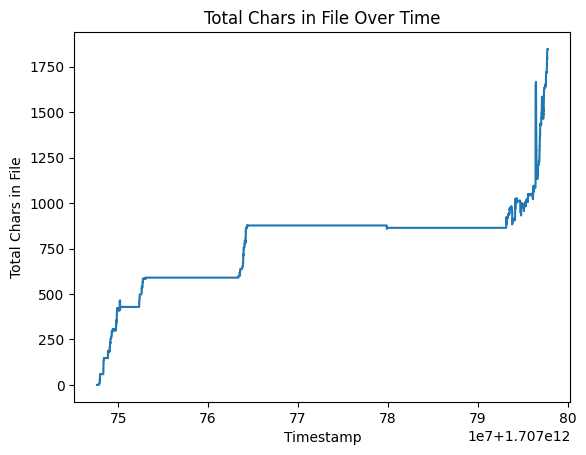

In [80]:
# Plotting total_chars_in_file over time
plt.plot(df['t'], df['_cs'].fillna(method='ffill'))
plt.title("Total Chars in File Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Total Chars in File")
plt.show()

/var/folders/6_/p9cds1196tqbq39vvgh78l9r0000gn/T/ipykernel_1937/3970496429.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dy_dx = np.gradient(df['_cs'].fillna(method='ffill'), df['t'])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: inval

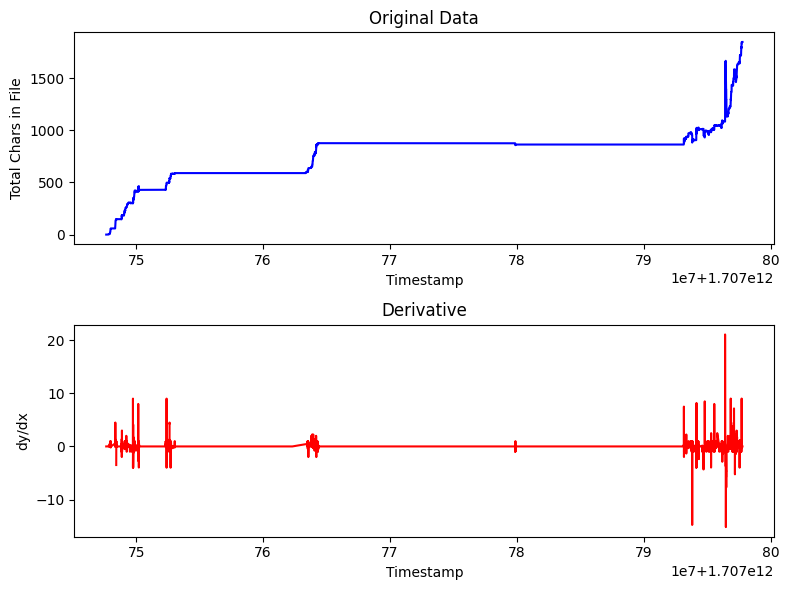

In [81]:
dy_dx = np.gradient(df['_cs'].fillna(method='ffill'), df['t'])

# Plotting the data
plt.figure(figsize=(8, 6))

# Original data
plt.subplot(2, 1, 1)
plt.plot(df['t'], df['_cs'].fillna(method='ffill'), color='blue')
plt.title("Original Data")
plt.xlabel("Timestamp")
plt.ylabel("Total Chars in File")

# Derivative data
plt.subplot(2, 1, 2)
plt.plot(df['t'], dy_dx, color='red')
plt.title("Derivative")
plt.xlabel("Timestamp")
plt.ylabel("dy/dx")

plt.tight_layout()
plt.show()